In [17]:
import json
import talib
import datetime
import numpy as np
import pandas as pd
import mplfinance as mpf
import pytse_client as tse
import matplotlib.pyplot as plt

In [18]:
# Getting name of the share
pticker = "خساپا"
TICKER_PATH = f"./dataset/{pticker}.csv"

## Translator function
<p>Translate persian ticker names to english name or reverse</p>

In [19]:
def translate(ticker, with_csv: bool = False, reverse: bool = False, default_value=None):
    """Translate persian ticker name to finglish
        if reverse = True then translate finglish to persian ticker name
        if with_csv = True then include .csv suffix in tranlation
        default_value will return if ticker not found"""
    rev = 'R' if reverse else ''
    ticker += '.csv'
    try:
        with open(f'./dataset/{rev}translator.json') as file:
            trans = json.load(file)
            return trans.get(ticker, default_value) if with_csv else trans.get(ticker, default_value).split('.')[0]
    except:
        print(f"Translation file not found for {ticker}")
        return default_value

## Update The Dataset

In [20]:
tse.download(pticker, write_to_csv=True, include_jdate=True, base_path='./dataset/')

{'خساپا':            date    open    high     low  adjClose         value     volume  \
 0    2001-05-06  3213.0  3500.0  3100.0    3260.0     181379751      55879   
 1    2001-05-07  3260.0  3262.0  3230.0    3260.0     325663118      99962   
 2    2001-05-08  3270.0  3351.0  3269.0    3281.0     797914981     241949   
 3    2001-05-09  3350.0  3445.0  3281.0    3281.0    1392841852     415588   
 4    2001-05-12  3340.0  3439.0  3303.0    3439.0      79685410      23538   
 ...         ...     ...     ...     ...       ...           ...        ...   
 4694 2023-09-09  2530.0  2539.0  2425.0    2454.0  659207530590  268588929   
 4695 2023-09-10  2405.0  2480.0  2395.0    2444.0  346901795026  141911501   
 4696 2023-09-11  2422.0  2489.0  2422.0    2450.0  398927057778  162860175   
 4697 2023-09-12  2439.0  2519.0  2439.0    2494.0  486792053984  195191356   
 4698 2023-09-13  2521.0  2570.0  2490.0    2522.0  417851473932  165712130   
 
       count  yesterday   close       jda

In [21]:
# Fetch and Customized Data
df = pd.read_csv(TICKER_PATH)
df.columns = df.columns.str.capitalize()
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [22]:
df.head()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close,Jdate
Date,,,,,,,,,,
2001-05-06,3213.0,3500.0,3100.0,3260.0,181379751,55879,77,3213.0,3260.0,1380-02-16
2001-05-07,3260.0,3262.0,3230.0,3260.0,325663118,99962,80,3260.0,3260.0,1380-02-17
2001-05-08,3270.0,3351.0,3269.0,3281.0,797914981,241949,87,3260.0,3281.0,1380-02-18
2001-05-09,3350.0,3445.0,3281.0,3281.0,1392841852,415588,185,3281.0,3281.0,1380-02-19
2001-05-12,3340.0,3439.0,3303.0,3439.0,79685410,23538,26,3281.0,3439.0,1380-02-22


In [23]:
df.describe()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close
count,4699.000000,4699.000000,4699.000000,4699.000000,4.699000e+03,4.699000e+03,4699.000000,4699.000000,4699.000000
mean,3033.649074,3087.643328,2986.179613,3048.236220,2.668727e+11,1.173639e+08,3994.716110,3046.938710,3045.077889
std,3816.923158,3905.891807,3742.433665,3856.364196,8.457583e+11,3.050058e+08,9645.216075,3856.799596,3857.282546
min,670.000000,692.000000,670.000000,681.000000,6.533610e+05,2.270000e+02,1.000000,623.000000,670.000000
25%,1395.000000,1412.000000,1360.500000,1387.500000,2.831548e+09,1.033490e+06,225.500000,1386.500000,1385.000000
50%,2000.000000,2021.000000,1963.000000,2000.000000,1.262281e+10,6.617253e+06,647.000000,1994.000000,2000.000000
75%,2953.500000,2971.500000,2917.000000,2950.000000,1.148306e+11,8.089831e+07,3813.000000,2950.000000,2950.000000
max,28247.000000,28247.000000,27270.000000,27569.000000,1.538377e+13,4.016952e+09,172374.000000,27569.000000,27569.000000


## Adding Indicators
<pre>
<p>These indicators are improve traning model</p>
<strong>including too many indicators can lead to overfitting</strong>
</pre>
- **indicators**
    - `RSI`    15 days
    - `EMA20`  20  days
    - `EMA100` 100 days
    - `EMA150` 150 days

In [24]:
## Caculate RSI and EMA indicators with talib
df['RSI'] = talib.RSI(df['Close'], 20)
df['EMA20'] = talib.EMA(df['Close'], 20)
df['EMA100'] = talib.EMA(df['Close'], 100)
df['EMA150'] = talib.EMA(df['Close'], 150)

df.dropna(inplace=True)

In [25]:
df.describe()

,Open,High,Low,Adjclose,Value,Volume,Count,Yesterday,Close,RSI,EMA20,EMA100,EMA150
count,4550.000000,4550.000000,4550.000000,4550.000000,4.550000e+03,4.550000e+03,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000
mean,3034.007033,3089.075385,2985.806374,3049.016044,2.756016e+11,1.212037e+08,4124.208132,3047.607253,3045.754286,49.578784,3046.770496,3050.002664,3053.392638
std,3878.695838,3969.100646,3802.992273,3918.781531,8.580985e+11,3.092096e+08,9774.883174,3919.224134,3919.715461,18.942911,3854.205269,3551.041007,3381.957489
min,670.000000,692.000000,670.000000,681.000000,6.533610e+05,2.270000e+02,1.000000,623.000000,670.000000,0.982181,733.694036,829.135793,864.997816
25%,1373.500000,1393.250000,1342.250000,1370.250000,3.226689e+09,1.297531e+06,260.000000,1370.000000,1361.500000,39.207236,1354.515775,1397.513768,1424.208011
50%,1938.500000,1970.500000,1901.000000,1939.000000,1.432044e+10,7.351748e+06,700.000000,1935.000000,1927.000000,48.773071,1938.794037,1928.745165,1946.528256
75%,2885.500000,2928.750000,2858.000000,2896.500000,1.238079e+11,8.646240e+07,4089.750000,2896.500000,2894.750000,62.039257,2898.956751,2829.919417,2795.635149
max,28247.000000,28247.000000,27270.000000,27569.000000,1.538377e+13,4.016952e+09,172374.000000,27569.000000,27569.000000,99.755716,25643.934474,20745.978716,17856.063269


## Plotting

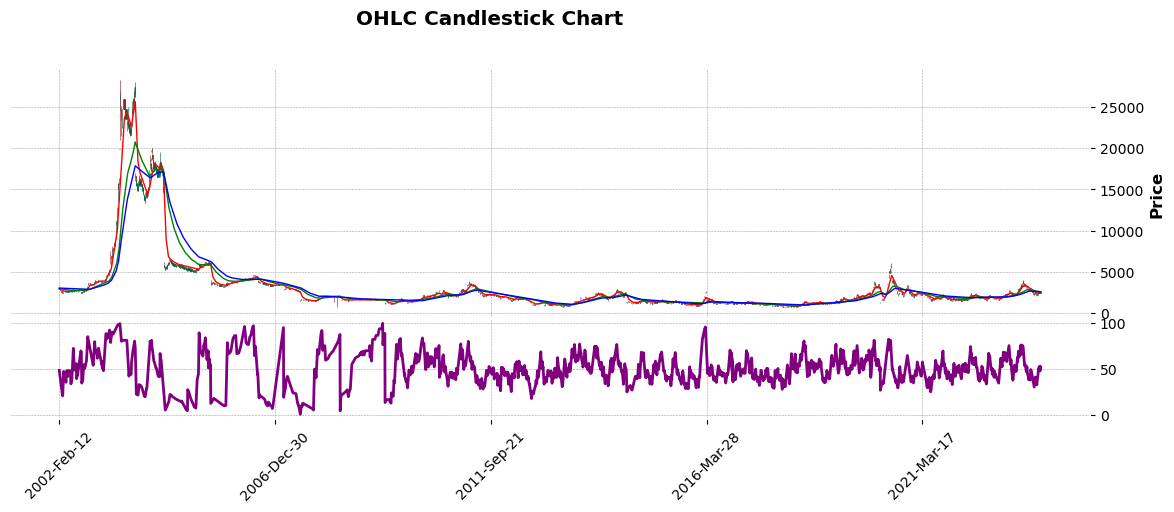

In [26]:
# Plot the candlesticks

add_plots = [
    mpf.make_addplot(df['RSI'].to_numpy(), color='purple', width=2, panel=1),
    mpf.make_addplot(df['EMA20'].to_numpy(), color='red', width=1),
    mpf.make_addplot(df['EMA100'].to_numpy(), color='green', width=1),
    mpf.make_addplot(df['EMA150'].to_numpy(), color='blue', width=1)
]

mpf.plot(
    df, type='candle', style='charles', title='OHLC Candlestick Chart',
    warn_too_much_data=10000, figsize=(15, 5), addplot=add_plots
)

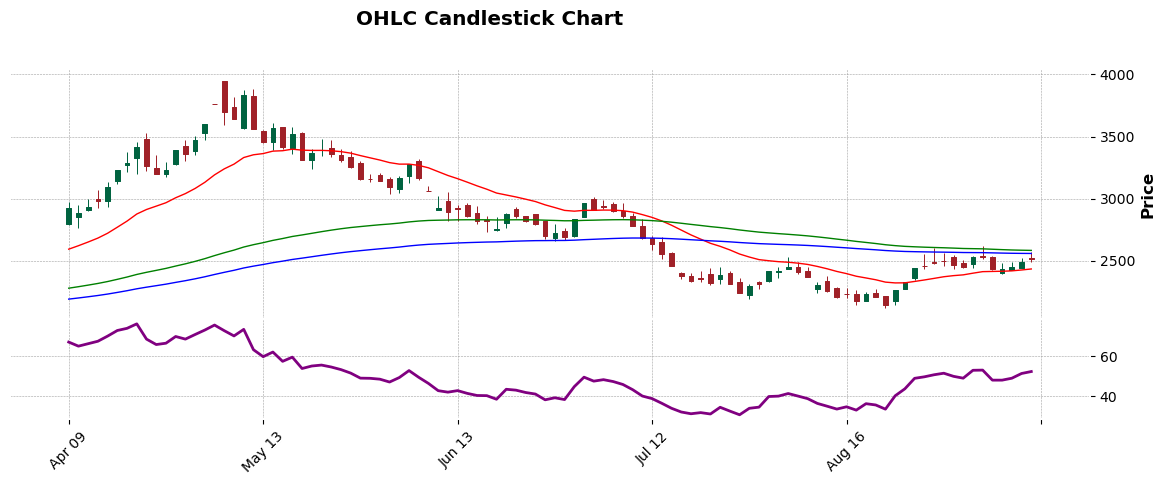

In [29]:
df_last_300 = df[-100:] # 300 just plot 300 days before
add_plots = [
    mpf.make_addplot(df_last_300['RSI'].to_numpy(), color='purple', width=2, panel=1),
    mpf.make_addplot(df_last_300['EMA20'].to_numpy(), color='red', width=1),
    mpf.make_addplot(df_last_300['EMA100'].to_numpy(), color='green', width=1),
    mpf.make_addplot(df_last_300['EMA150'].to_numpy(), color='blue', width=1)
]

mpf.plot(
    df_last_300, type='candle', style='charles', title='OHLC Candlestick Chart',
    warn_too_much_data=1000, figsize=(15, 5), addplot=add_plots
)

In [28]:
# Overwirte new datas
df.to_csv(TICKER_PATH)